In [17]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

from keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

In [8]:
path = os.getcwd()

train_dir = os.path.join(path, 'data/small_data/train/')
val_dir = os.path.join(path, 'data/small_data/validation/')

In [15]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150),
                                                    batch_size=20, class_mode='binary')
val_generator = train_datagen.flow_from_directory(val_dir, target_size=(150, 150), 
                                                  batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',
                 input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(521, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.rmsprop(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(train_generator, 
                              steps_per_epoch=100, 
                              epochs=30, 
                              validation_data=val_generator, 
                              validation_steps=50)

W0812 16:08:13.625380 139986278246208 deprecation.py:506] From /home/jtorretr/anaconda3/envs/deepl/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Epoch 1/30
100/100 [==============================] - 56s 556ms/step - loss: 0.6936 - acc: 0.5140 - val_loss: 0.6882 - val_acc: 0.5630
Epoch 2/30
100/100 [==============================] - 64s 642ms/step - loss: 0.6864 - acc: 0.5490 - val_loss: 0.7061 - val_acc: 0.5110
Epoch 3/30
100/100 [==============================] - 57s 567ms/step - loss: 0.6702 - acc: 0.5780 - val_loss: 0.6655 - val_acc: 0.5940
Epoch 4/30
100/100 [==============================] - 56s 563ms/step - loss: 0.6634 - acc: 0.6015 - val_loss: 0.6584 - val_acc: 0.6230
Epoch 5/30
100/100 [==============================] - 60s 605ms/step - loss: 0.6502 - acc: 0.6245 - val_loss: 0.6842 - val_acc: 0.5600
Epoch 6/30
100/100 [==============================] - 63s 633ms/step - loss: 0.6317 - acc: 0.6420 - val_loss: 0.6308 - val_acc: 0.6390
Epoch 7/30
100/100 [==============================] - 57s 569ms/step - loss: 0.6220 - acc: 0.6525 - val_loss: 0.6284 - val_acc: 0.6380
Epoch 8/30
100/100 [==============================] - 5

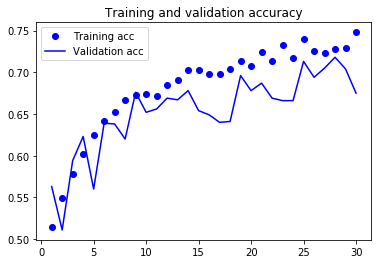

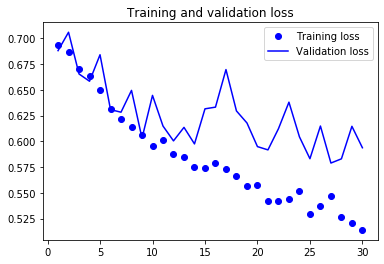

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()